In [2]:
suppressMessages(library(igraph))
suppressMessages(library(miloR))
suppressMessages(library(Seurat))
suppressMessages(library(patchwork))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(tidyverse))
suppressMessages(library(monocle))
suppressMessages(library(conflicted))
suppressMessages(library(cowplot))
suppressMessages(library(SingleCellExperiment))

Warning message:
“package ‘Seurat’ was built under R version 4.3.3”
Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Warning message:
“package ‘sp’ was built under R version 4.3.3”
Warning message:
“package ‘patchwork’ was built under R version 4.3.2”
Warning message:
“package ‘Matrix’ was built under R version 4.3.2”
Warning message:
“package ‘data.table’ was built under R version 4.3.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.2”
Warning message:
“package ‘readr’ was built under R version 4.3.2”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”
Warning message:
“package ‘stringr’ was built under R version 4.3.2”
Warning message:
“package ‘monocle’ was built under R version 4.3.3”
Warning message:
“package ‘Biobase’ was built under R version 4.3.3”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘VGAM’

In [3]:
suppressMessages(conflicts_prefer(Biobase::exprs))
suppressMessages(conflicts_prefer(Biobase::`exprs<-`))
suppressMessages(conflicts_prefer(Biobase::pData))
suppressMessages(conflicts_prefer(Biobase::`pData<-`))
suppressMessages(conflicts_prefer(Biobase::fData))
suppressMessages(conflicts_prefer(Biobase::`fData<-`))
suppressMessages(conflicts_prefer(dplyr::filter))

# Load data

In [4]:
cds_olg <- readRDS(file = "/ru-auth/local/home/aliao/scratch/projects/EnrichSci/250112_Enrich_OLG/submission_files/cds_olg.rds")

# Density plots

In [5]:
clustering_analysis_seurat <- function (cds, pc_num = 30, num_genes = 2000, num_resolution = 0.5, 
    regress_factor = "no_factor") 
{
    require(tidyverse)
    require(cowplot)
    require(monocle)
    require(Seurat)
    seu = CreateSeuratObject(counts = exprs(cds), meta.data = pData(cds))
    seu <- NormalizeData(object = seu, normalization.method = "LogNormalize", 
        scale.factor = 10000)
    seu <- FindVariableFeatures(object = seu, selection.method = "vst", 
        nfeatures = num_genes)
    seu <- ScaleData(object = seu)
    seu <- RunPCA(object = seu, npcs = pc_num, features = VariableFeatures(object = seu))
    seu <- FindNeighbors(object = seu, dims = 1:pc_num)
    seu <- FindClusters(object = seu, resolution = num_resolution, 
        n.start = 20)
    seu <- RunUMAP(object = seu, dims = 1:pc_num, min.dist = 0.1)
    return(seu)
}

In [6]:
seu_olg = clustering_analysis_seurat(cds_olg, num_resolution = 0.5)

Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  ENSMUSG00000032841.16, ENSMUSG00000022548.15, ENSMUSG00000027375.15, ENSMUSG00000036777.9, ENSMUSG00000038665.16, ENSMUSG00000056222.16, ENSMUSG00000064373.14, ENSMUSG00000098973.3, ENSMUSG00000109233.2, ENSMUSG00000025790.15 
	   ENSMUSG00000030849.19, ENSMUSG00000039145.17, ENSMUSG00000111994.2, ENSMUSG00000097098.9, ENSMUSG00000063296.6, ENSMUSG00000022748.9, ENSMUSG00000116885.2, ENSMUSG00000035202.9, ENSMUSG00000021665.10, ENSMUSG00000104093.2 
	   ENSMUSG00000039316.15, ENSMUSG00000024197.11, ENSMUSG00000073418.5, ENSMUSG00000118642.2, ENSMUSG00000100534.2, ENSMUSG00000029381.17, ENSMUSG00000050103.19, ENSMUSG00000050063.19, ENSMUSG00000112276.2, ENSMUSG00000028677.20 
Negative:  ENSMUSG00000015829.14, ENSMUSG00000073528.8, ENSMUSG00000022263.11, ENSMUSG00000041078.8, ENSMUSG00000058153.16

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 18154
Number of edges: 664539

Running Louvain algorithm...
Maximum modularity in 20 random starts: 0.8239
Number of communities: 8
Elapsed time: 4 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
03:27:11 UMAP embedding parameters a = 1.577 b = 0.8951

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

03:27:11 Read 18154 rows and found 30 numeric columns

03:27:11 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

03:27:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:27:13 Writing NN index file to 

In [7]:
sce <- SingleCellExperiment(
  assays = list(counts = exprs(cds_olg)),
  colData = pData(cds_olg),
  rowData = fData(cds_olg)
)

In [8]:
milo_obj <- Milo(sce)

In [9]:
umap_coords <- cbind(
    colData(milo_obj)$OL_umap_1,
    colData(milo_obj)$OL_umap_2
)
colnames(umap_coords) <- c("UMAP1", "UMAP2")

reducedDim(milo_obj, "UMAP") <- umap_coords

In [10]:
assay(milo_obj, "logcounts") <- log2(assay(milo_obj, "counts") + 1)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.6 GiB”


In [11]:
reducedDim(milo_obj, "PCA") <- seu_olg@reductions$pca@cell.embeddings  # Uncorrected PCA

Constructing kNN graph with k:60

Checking valid object

Running refined sampling with reduced_dim



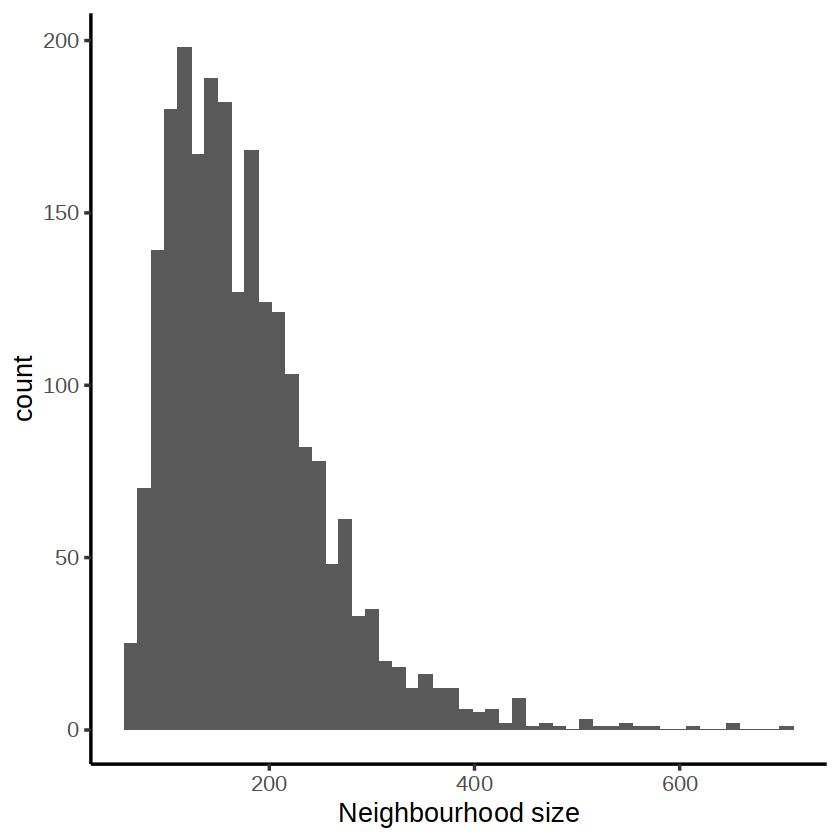

In [12]:
milo_obj <- buildGraph(milo_obj, k = 60, d = 30, transposed=TRUE)  
milo_obj <- makeNhoods(milo_obj, d = 30, prop = 0.3) 
plotNhoodSizeHist(milo_obj) 

In [13]:
milo_obj <- calcNhoodDistance(milo_obj, d = 30) 

'as(<dgTMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "CsparseMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").



In [14]:
milo_obj <- buildNhoodGraph(milo_obj, overlap = 1)

In [15]:
test.meta <- data.frame("age"=c(rep("2mo", 3), rep("2yo", 3)), "Replicate"=rep(c("male_1", "male_2", "male_3"), 2))
test.meta$Conditions <- paste(test.meta$age, test.meta$Replicate, sep="_")
rownames(test.meta) <- test.meta$Conditions
test.meta

,age,Replicate,Conditions
,<chr>,<chr>,<chr>
2mo_male_1,2mo,male_1,2mo_male_1
2mo_male_2,2mo,male_2,2mo_male_2
2mo_male_3,2mo,male_3,2mo_male_3
2yo_male_1,2yo,male_1,2yo_male_1
2yo_male_2,2yo,male_2,2yo_male_2
2yo_male_3,2yo,male_3,2yo_male_3


In [16]:
milo_obj <- countCells(milo_obj, meta.data = colData(milo_obj), samples = "Conditions")

Checking meta.data validity

Counting cells in neighbourhoods



In [17]:
da_results <- testNhoods(milo_obj, design = ~age, design.df=test.meta[colnames(nhoodCounts(milo_obj)), ], norm.method = 'RLE')

Using RLE normalisation

Performing spatial FDR correction withk-distance weighting



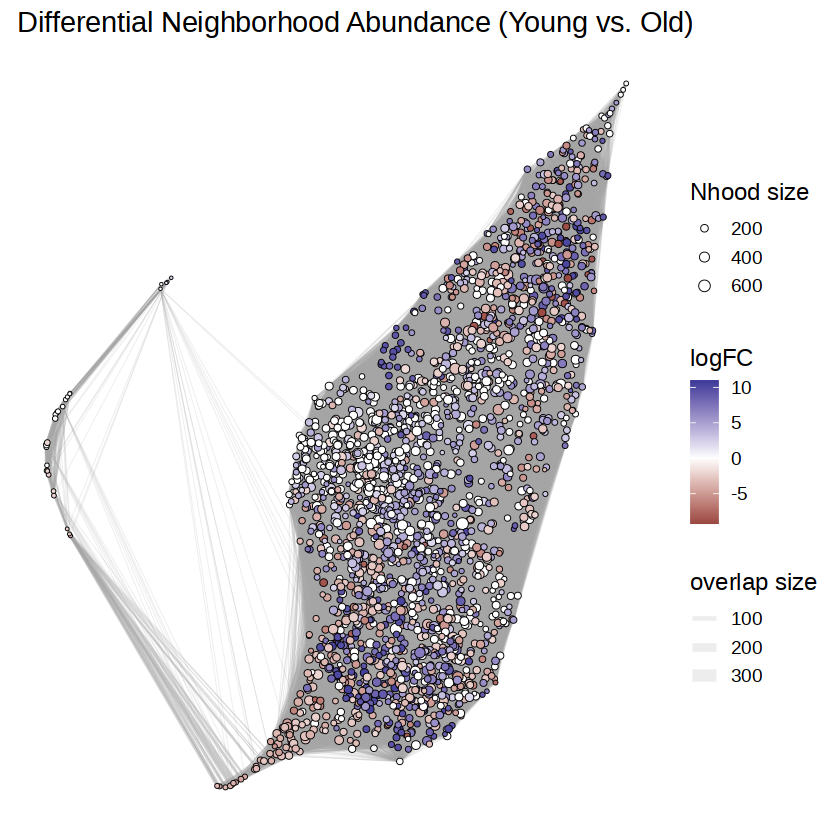

In [18]:
plotNhoodGraphDA(milo_obj, da_results, alpha = 0.05, res_column = "logFC") +
    ggtitle("Differential Neighborhood Abundance (Young vs. Old)")

In [19]:
nhood_umap_coords <- reducedDim(milo_obj, "UMAP")[as.numeric(vertex_attr(nhoodGraph(milo_obj))$name),]

In [20]:
# Create an empty list to store proportions
nhood_age_proportions <- list()

# Loop through each neighborhood centroid
for (i in 1:nrow(nhood_umap_coords)) {
  
  # Print progress
  message(sprintf("Processing neighborhood %d of %d", i, nrow(nhood_umap_coords)))

  # Extract neighborhood centroid coordinates
  centroid_x <- nhood_umap_coords[i, "UMAP1"]
  centroid_y <- nhood_umap_coords[i, "UMAP2"]
  
  # Compute Euclidean distance from each cell to the centroid
  distances <- sqrt((cds_olg$OL_umap_1 - centroid_x)^2 + 
                    (cds_olg$OL_umap_2 - centroid_y)^2)
  
  # Identify cells within radius = 1
  nearby_cells <- cds_olg[,distances <= 1 ]
  
  # Calculate proportions of '2mo' and '25mo' within the neighborhood
  proportion_2mo <- mean(nearby_cells$age == "2mo", na.rm = TRUE)
  proportion_25mo <- mean(nearby_cells$age == "25mo", na.rm = TRUE)
  
  # Determine the most common OL_subtype in the neighborhood
  if (ncol(nearby_cells) > 0) {
    ol_type_counts <- table(nearby_cells$OL_subtype, useNA = "no")  # Count occurrences
    majority_ol_type <- names(ol_type_counts)[which.max(ol_type_counts)]  # Get the most frequent type
  } else {
    majority_ol_type <- NA  
  }

    
  # Store results in a list
  nhood_age_proportions[[i]] <- data.frame(
    Nhood = rownames(nhood_umap_coords)[i],
    Proportion_2mo = proportion_2mo,
    Proportion_25mo = proportion_25mo,
    Total_Cells = ncol(nearby_cells),  
    Nhood_group_OL_type = majority_ol_type
  )
}

nhood_age_proportions_df <- do.call(rbind, nhood_age_proportions)
head(nhood_age_proportions_df)

Processing neighborhood 1 of 2265

Processing neighborhood 2 of 2265

Processing neighborhood 3 of 2265

Processing neighborhood 4 of 2265

Processing neighborhood 5 of 2265

Processing neighborhood 6 of 2265

Processing neighborhood 7 of 2265

Processing neighborhood 8 of 2265

Processing neighborhood 9 of 2265

Processing neighborhood 10 of 2265

Processing neighborhood 11 of 2265

Processing neighborhood 12 of 2265

Processing neighborhood 13 of 2265

Processing neighborhood 14 of 2265

Processing neighborhood 15 of 2265

Processing neighborhood 16 of 2265

Processing neighborhood 17 of 2265

Processing neighborhood 18 of 2265

Processing neighborhood 19 of 2265

Processing neighborhood 20 of 2265

Processing neighborhood 21 of 2265

Processing neighborhood 22 of 2265

Processing neighborhood 23 of 2265

Processing neighborhood 24 of 2265

Processing neighborhood 25 of 2265

Processing neighborhood 26 of 2265

Processing neighborhood 27 of 2265

Processing neighborhood 28 of 2265

P

,Nhood,Proportion_2mo,Proportion_25mo,Total_Cells,Nhood_group_OL_type
,<chr>,<dbl>,<dbl>,<int>,<chr>
Samples,17408,0.4907895,0.5092105,760,MOL_2
Samples1,8807,0.5215760,0.4784240,533,MOL_5_6
Samples2,2652,0.4821029,0.5178971,894,MOL_5_6
Samples3,12563,0.4937811,0.5062189,804,MOL_5_6
Samples4,7285,0.4622642,0.5377358,1060,MOL_5_6
Samples5,5120,0.5726776,0.4273224,915,MOL_5_6


In [21]:
range(unique(nhood_age_proportions_df$Total_Cells))
median(unique(nhood_age_proportions_df$Total_Cells))
mean(unique(nhood_age_proportions_df$Total_Cells))

[1]   36 1406

[1] 762.5

[1] 762.4537

In [22]:
table(cds_olg$age)


25mo  2mo 
8717 9437 

In [23]:
da_results$UMAP1 = nhood_umap_coords[,"UMAP1"]
da_results$UMAP2 = nhood_umap_coords[,"UMAP2"]
da_results$Proportion_2mo = nhood_age_proportions_df$Proportion_2mo
da_results$Proportion_25mo = nhood_age_proportions_df$Proportion_25mo
da_results$Nhood_group_OL_type = nhood_age_proportions_df$Nhood_group_OL_type
da_results$Total_Cells = nhood_age_proportions_df$Total_Cells

#normalize: equal 1/2 would be 9077
da_results$Proportion_2mo_adj = ifelse( nhood_age_proportions_df$Proportion_2mo < 0.705*(9437/9077), 0, nhood_age_proportions_df$Proportion_2mo*(9437/9077))
da_results$Proportion_25mo_adj = ifelse( nhood_age_proportions_df$Proportion_25mo < 0.705*(8717/9077), 0, nhood_age_proportions_df$Proportion_25mo*(8717/9077))

da_results$enriched = ifelse( nhood_age_proportions_df$Proportion_25mo > 0.705*(8717/9077), 'aged', 
                              ifelse(nhood_age_proportions_df$Proportion_2mo > 0.705*(9437/9077), 'young', 'non-enriched')
                                    )

da_results$Proportion_2mo_norm = da_results$Proportion_2mo/(9437/9077)
da_results$Proportion_25mo_norm = da_results$Proportion_25mo/(8717/9077)

da_results$Log2FC_25vs2 <- log2(da_results$Proportion_25mo_norm / da_results$Proportion_2mo_norm )
da_results$Log2FC_2vs25 <- log2(da_results$Proportion_2mo_norm / da_results$Proportion_25mo_norm )

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(level)` instead.”


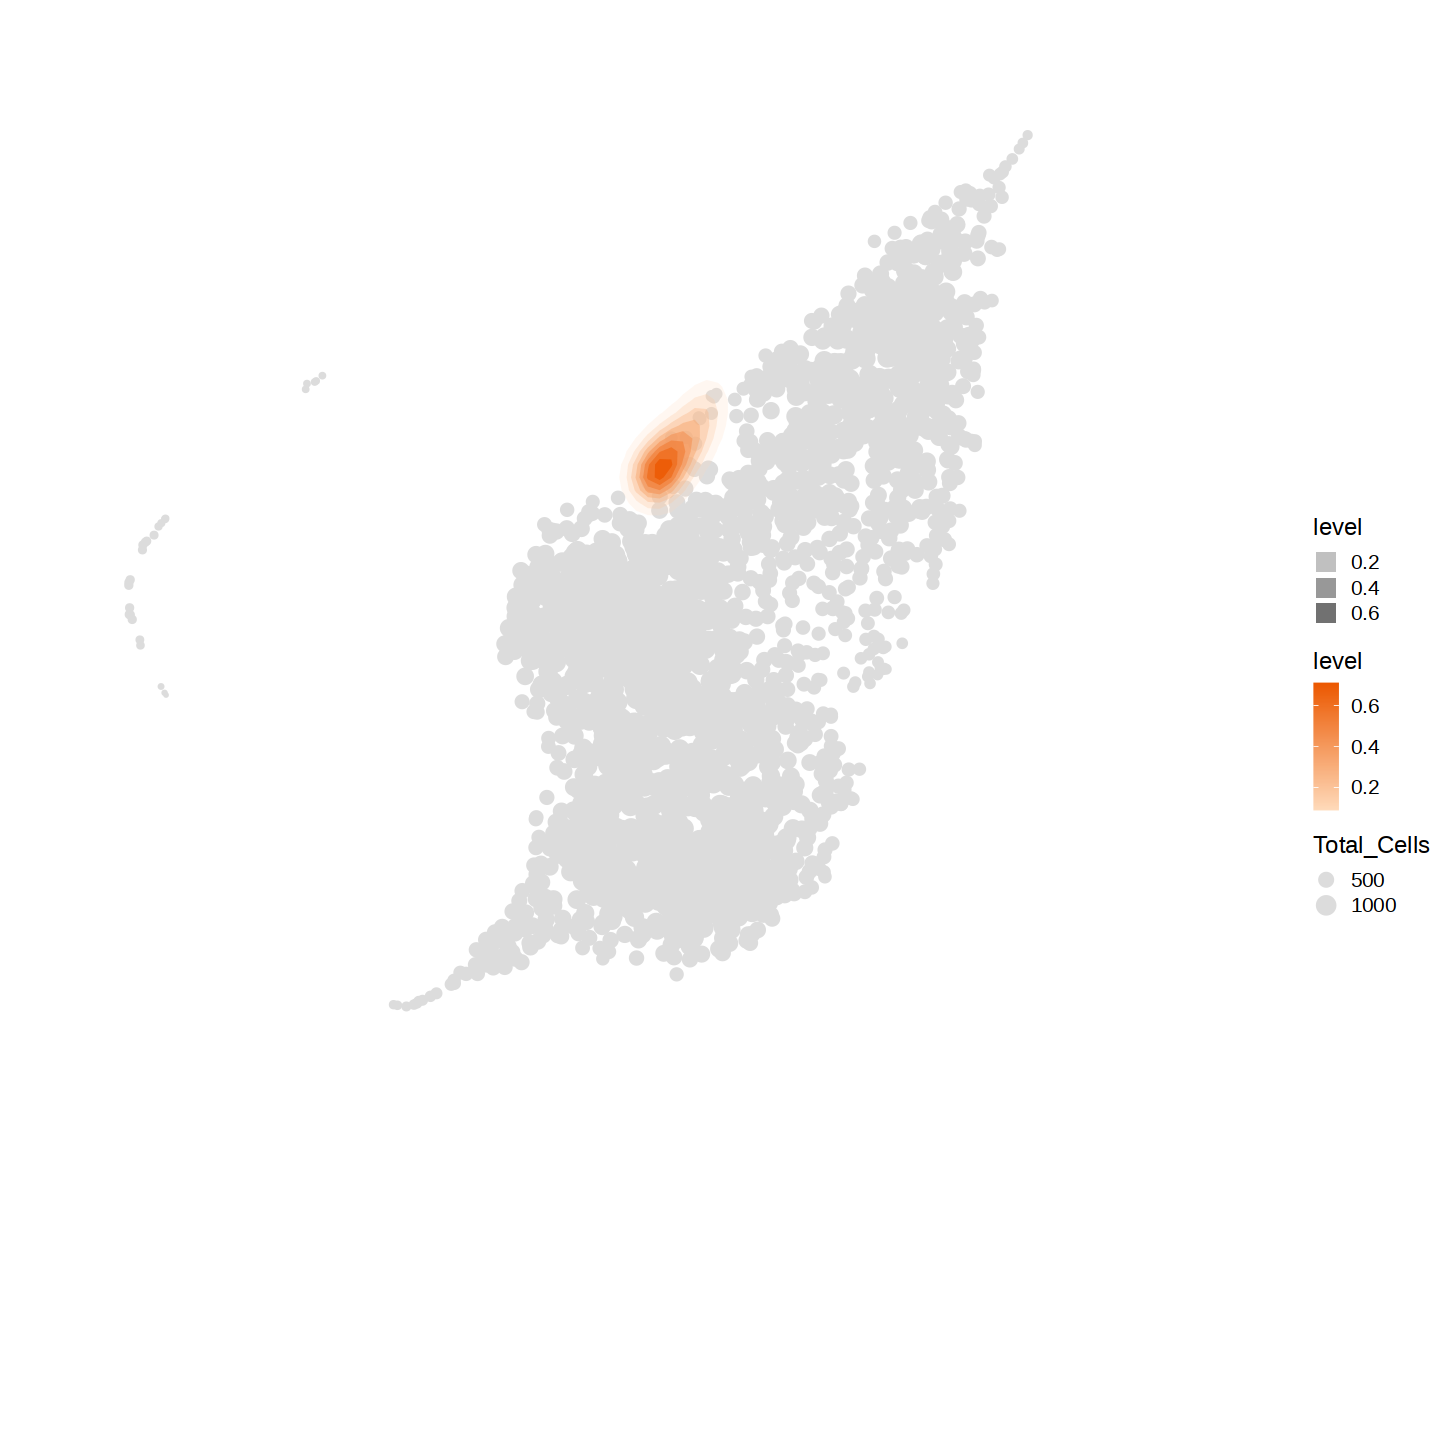

In [24]:
df_plot = da_results
g1 <- ggplot(data = NULL)+
    geom_point(data = df_plot, aes(size = Total_Cells, x=UMAP1, y=UMAP2), color = "#DCDCDC",shape=16) +
    stat_density2d(data = df_plot %>% filter(enriched %in% c("aged")), ## filter by label of interest
                 aes(x=UMAP1,y=UMAP2, alpha=..level.., fill=..level..), 
                 contour_var = 'density', size=2, bins=9, , geom='polygon', h = c(1.2, 1.2)) +  #, h = c(1.2, 1.2)
    scale_fill_gradientn(colours = colorRampPalette(c("#FFDBBB", "#EC5800"))(100))+
    scale_alpha_continuous(range=c(0.2,0.8)) + 
    xlim(min(df_plot$UMAP1)-1 ,max(df_plot$UMAP2)+1) +
    ylim(min(df_plot$UMAP1)-1 ,max(df_plot$UMAP2)+1) +
    theme_cowplot() +
    theme(plot.title = element_text(hjust = 0.5),
        axis.title = element_blank(), axis.text = element_blank(),
        axis.ticks = element_blank(), axis.line = element_blank())
options(repr.plot.width = 12, repr.plot.height = 12)
g1

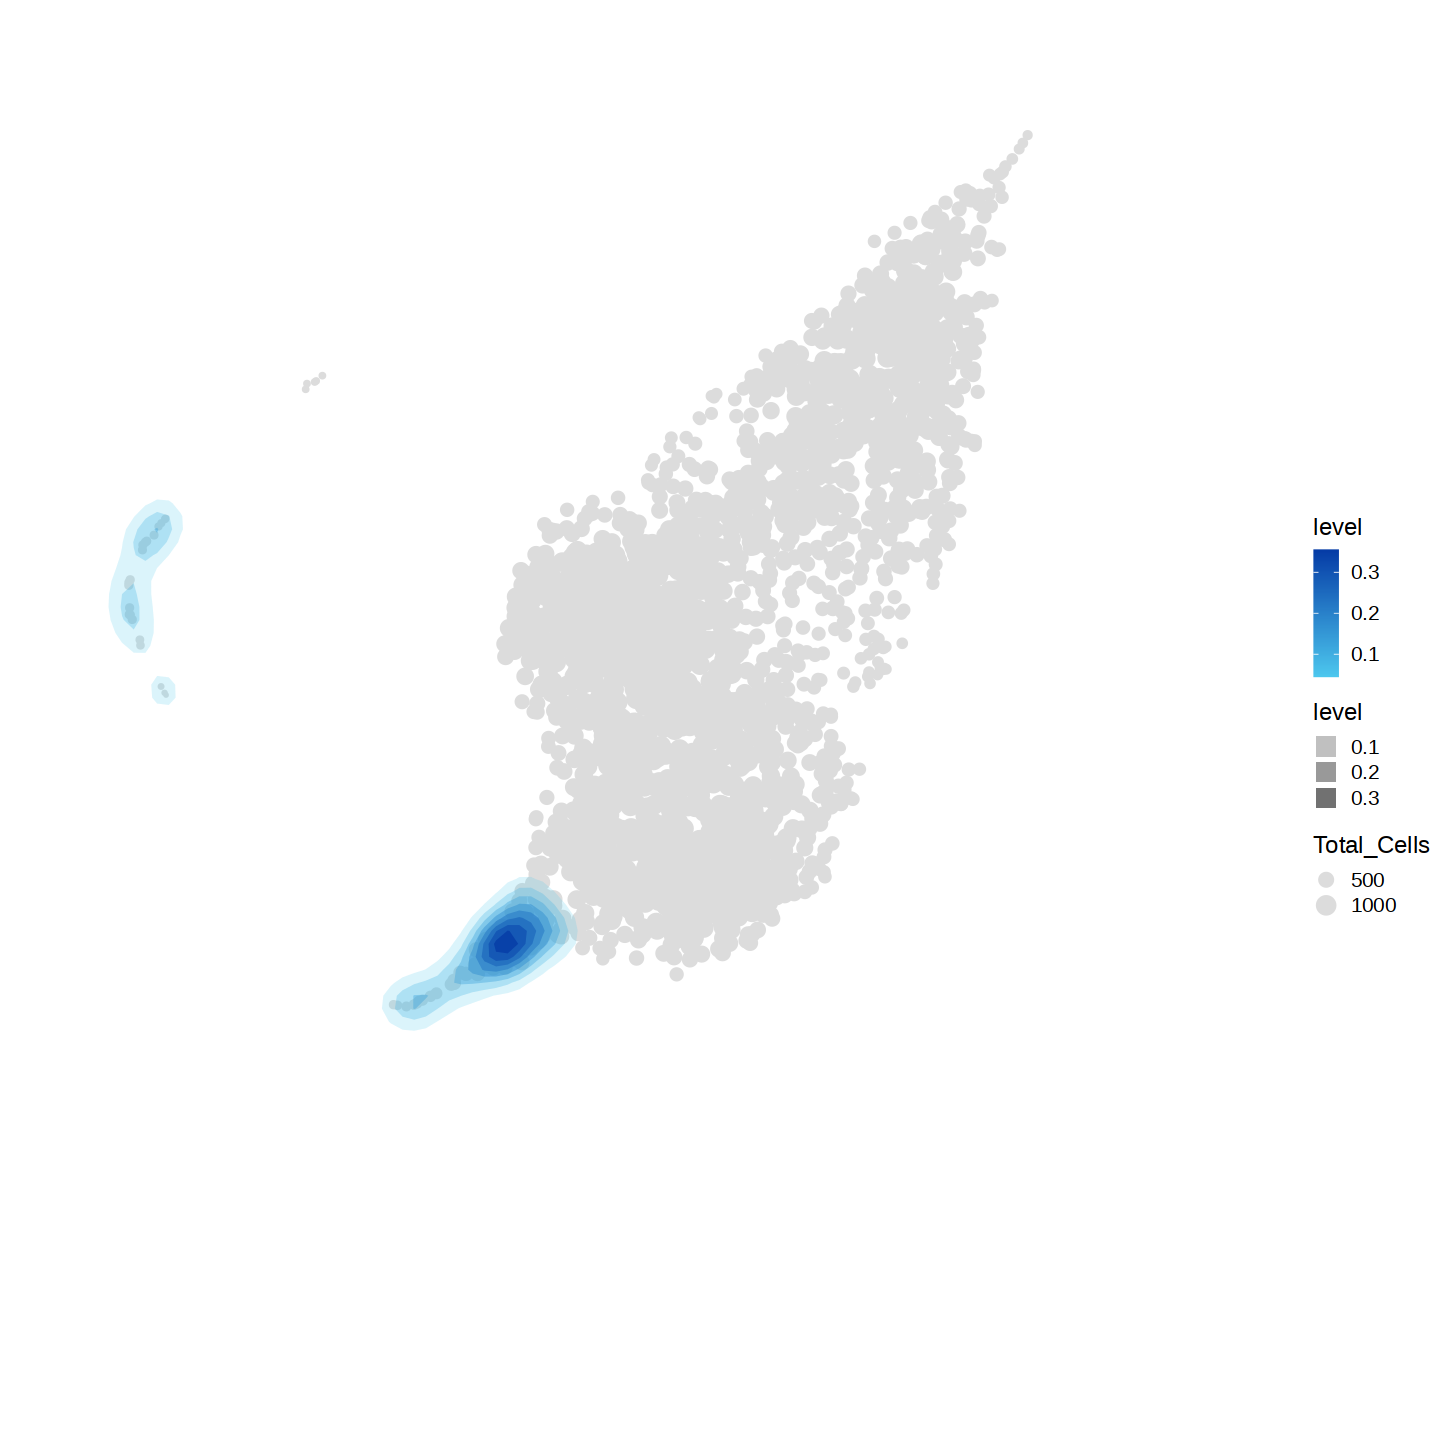

In [25]:
options(repr.plot.width = 7, repr.plot.height = 7)
df_plot = da_results
g1 <- ggplot(data = NULL)+
    geom_point(data = df_plot, aes(size = Total_Cells, x=UMAP1, y=UMAP2), color = "#DCDCDC",shape=16) +
    stat_density2d(data = df_plot %>% filter(enriched %in% c("young")), ## filter by label of interest
                 aes(x=UMAP1,y=UMAP2, alpha=..level.., fill=..level..), 
                 contour_var = 'density', size=2, bins=9, , geom='polygon', h = c(1.2, 1.2) ) +
    scale_fill_gradientn(colours = colorRampPalette(c("#4DC8EF", "#053BA6"))(100))+
    scale_alpha_continuous(range=c(0.2,0.8)) + 
    xlim(min(df_plot$UMAP1)-1 ,max(df_plot$UMAP2)+1) +
    ylim(min(df_plot$UMAP1)-1 ,max(df_plot$UMAP2)+1) +
    theme_cowplot() +
    theme(plot.title = element_text(hjust = 0.5),
        axis.title = element_blank(), axis.text = element_blank(),
        axis.ticks = element_blank(), axis.line = element_blank())
options(repr.plot.width = 12, repr.plot.height = 12)
g1

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


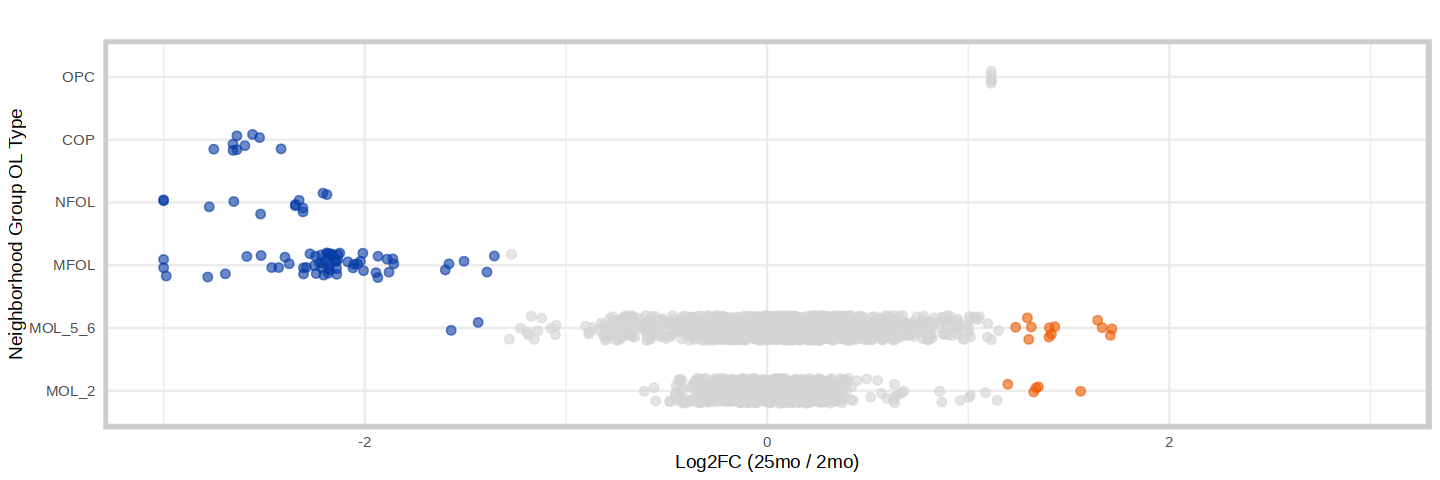

In [26]:
options(repr.plot.width = 12, repr.plot.height = 4)
da_results$Log2FC_25vs2_cap <- pmax(pmin(da_results$Log2FC_25vs2, 3), -3)

da_results$color_category <- ifelse( da_results$enriched == 'young', "#053BA6",
                              ifelse( da_results$enriched == 'aged', "#EC5800", "gray83"))

da_results$Nhood_group_OL_type_factor <- factor(da_results$Nhood_group_OL_type, 
                                          levels = c( "MOL_2", "MOL_5_6", "MFOL","NFOL","COP", "OPC"))

ggplot(da_results, aes(x = Log2FC_25vs2_cap, y = Nhood_group_OL_type_factor, color = color_category)) +
  geom_jitter(width = 0, height = 0.2, alpha = 0.6, size = 2) + 
  scale_color_identity() +  
  labs(x = "Log2FC (25mo / 2mo)", y = "Neighborhood Group OL Type",
       title = "") +
  xlim(-3, 3) +  
  theme_minimal() +
  theme(panel.border = element_rect(color = "gray80", fill = NA, size = 2))  